In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")

## Multilingual

In [2]:
name_mapping = {
    'MetaMath-Mistral-7B.csv': 'Math',
    'GEITje-7B-ultra.csv': 'NL',
    'phenotype_0.csv': 'MERG$E^3$',
    'old_phenotype_0.csv': 'MERG$E^3$',
    'Arithmo2-Mistral-7B.csv': 'Math (2)',
    'em_german_mistral_v01.csv': 'DE',
    'phenotype_0_german_ties.csv': 'MERG$E^3$',
    'Abel-7B-002.csv': 'Math (3)', # TODO
    'Mistral-7B-v0.1.csv': None,  # TODO
    'Mistral-Ita-7b.csv': 'IT',
    'RoMistral-7b-Instruct.csv': 'RO',
}

In [3]:
# ----------------------------------------------------------------------
# Read data for each language
# ------------------------------------------------------------------------
# Example file names; adjust as needed
df = pd.read_csv("data/multilingual.csv")    # 'bin', 'accuracy'

In [5]:
# rename 
df['bin'] = df['bin'].map(name_mapping)

df.dropna(inplace=True)

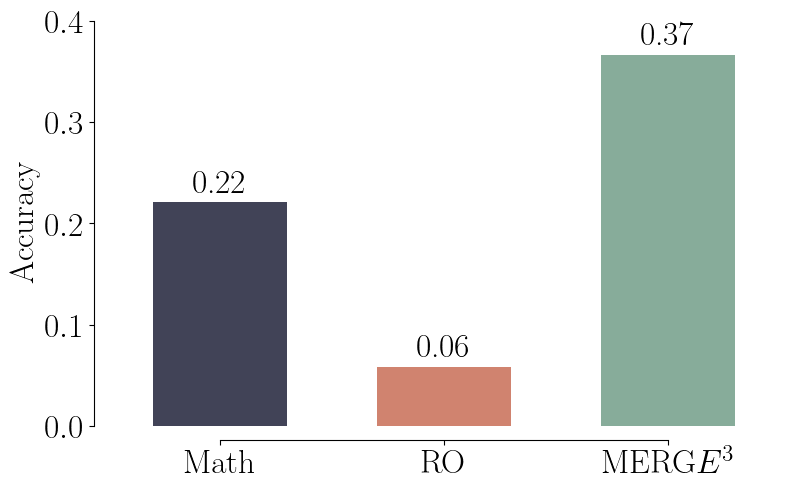

In [6]:

colors = {
    'MERG$E^3$': color_dict["Cambridge blue"],
    'Math': color_dict["Delft Blue"],
    'Math (2)': color_dict["Delft Blue"],
    'Math (3)': color_dict["Delft Blue"],
    'DE': color_dict["Burnt sienna"],
    'IT': color_dict["Burnt sienna"],
    'RO': color_dict["Burnt sienna"],
    'NL': color_dict["Burnt sienna"],
}
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
    data=df,
    y="accuracy",
    x="bin",
    hue="bin",
    palette=colors,
    width=0.6,  # narrower bars
    ax=ax
)

# Give some extra headroom for the labels
max_val = df['accuracy'].max()
ax.set_ylim(top=max_val * 1.1)

# Put numeric labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.2f}",
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3),     # offset label slightly above the bar
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=24        # <-- Larger font for bar labels
        )

# Make tick-label fonts larger
ax.tick_params(axis='both', labelsize=24)  # <-- Larger tick labels

# Increase label/title font sizes
plt.xlabel("", fontsize=24)   # <-- Larger x-axis label
plt.ylabel("Accuracy", fontsize=24)  # <-- Larger y-axis label

# Optional: remove the top/right spines
sns.despine(offset=10, trim=True)

plt.tight_layout()

plt.savefig(f"figures/multilingual.pdf", bbox_inches='tight')
plt.show()
